# **ML_PROJECT_GROUP25&26**
#### Access to financial services is essential for economic development in Tanzania, where many individuals and small businesses depend on loans to support education, entrepreneurship, medical needs, and personal growth. However, financial institutions often face challenges in determining whether applicants will repay their loans, leading to risks of default and financial losses. Traditional loan evaluation methods rely heavily on manual assessment and basic rules, which can be time-consuming and sometimes inconsistent. With the advancement of technology, Machine Learning provides a more accurate and data-driven approach to predicting loan repayment behavior. This project focuses on developing a loan prediction model using applicant data such as income, employment experience, education level, home ownership status, credit history length, credit score, and previous loan defaults. By analyzing historical loan records, the system can identify patterns associated with high-risk and low-risk borrowers. The model aims to improve decision-making efficiency and reduce human bias in loan approval processes. It also supports financial institutions in minimizing default rates and improving profitability. Furthermore, the system can promote financial inclusion by ensuring that eligible applicants are not unfairly rejected. Overall, this project demonstrates how Machine Learning can enhance risk assessment and contribute to sustainable financial growth in Tanzania.

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN



In [3]:
loan = pd.read_csv(r"C:\Users\HP\Desktop\loan_approved\loan_data.csv")

In [4]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
loan.shape

(45000, 14)

In [6]:
loan.columns.values

array(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'], dtype=object)

### **Data preprocessing** 

In [7]:
# Checking the data types of all the columns
loan.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [8]:
#change the data type of age_int,cb_person_cred_hist_length
loan1 = loan.astype({
    'person_age': 'int',           # change Age to integer
    'cb_person_cred_hist_length': 'int',      # cb_person_cred_hist_length to integer
})


In [9]:
# Checking the data types of all the columns
loan1.dtypes

person_age                          int32
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int32
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [10]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
loan1.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int32  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int32  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Dealing with missing value:

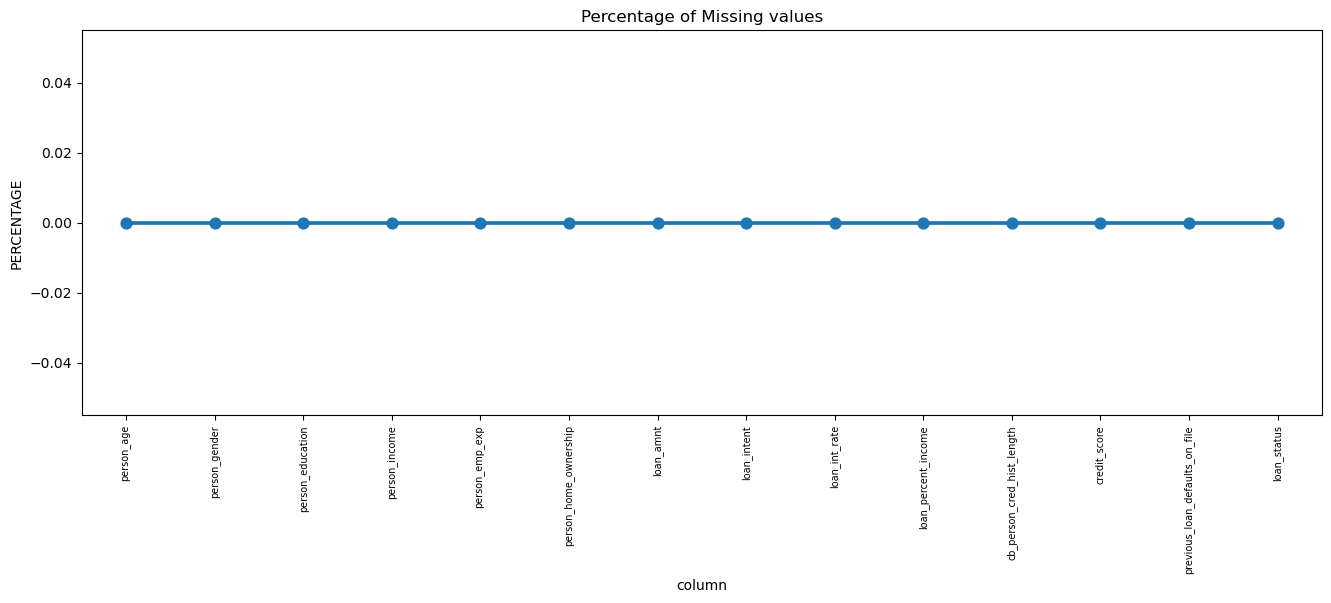

In [11]:
missing = pd.DataFrame({
    'column': loan1.isnull().sum().index,
    'missing_pct': loan1.isnull().sum().values * 100 / loan1.shape[0]
})
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='missing_pct', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here

### Treatment of outliers:

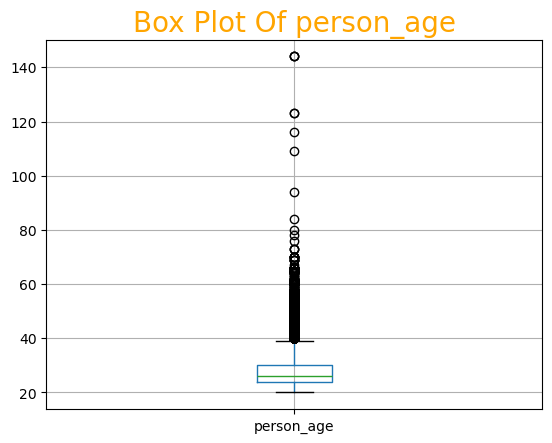

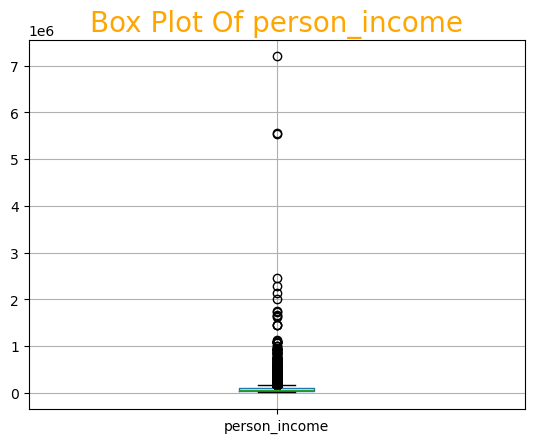

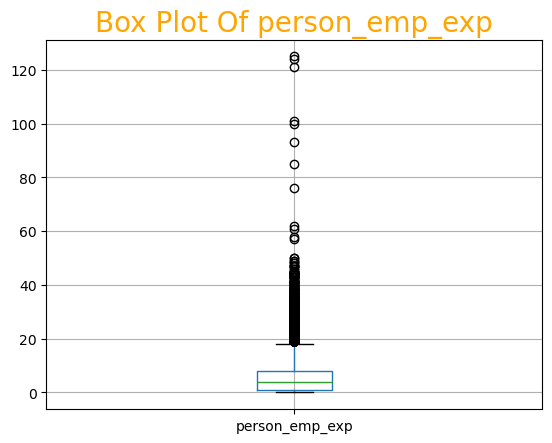

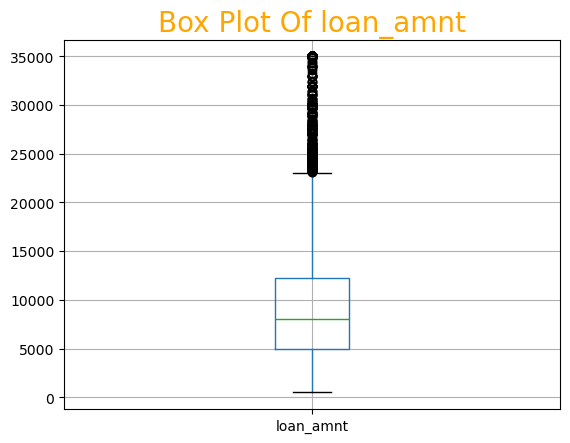

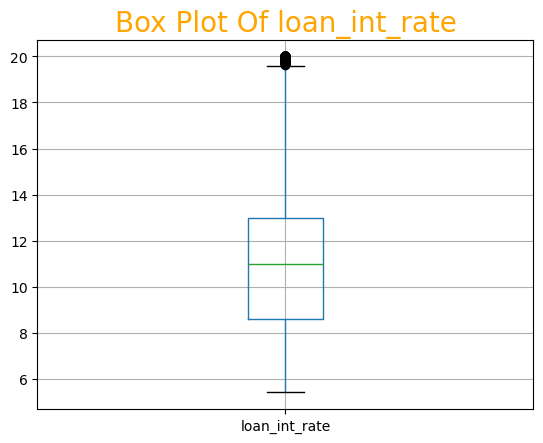

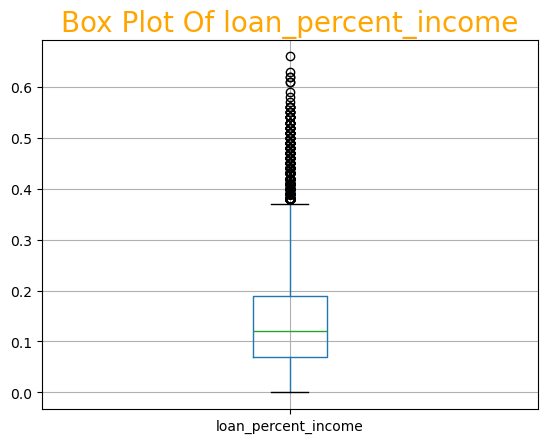

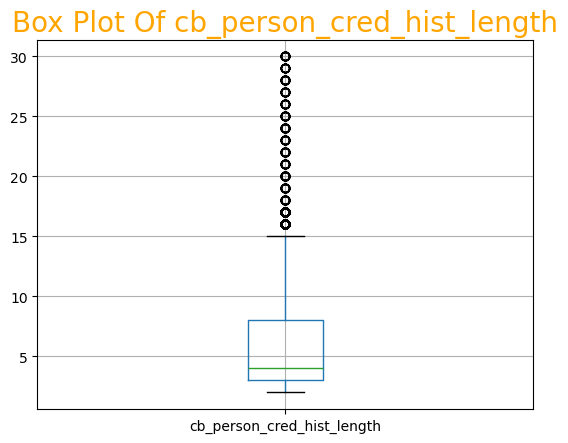

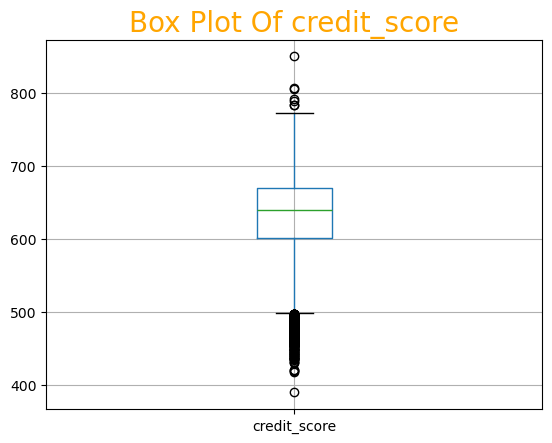

In [12]:
# boxplot all the numerical columns and see if there any outliers
for i in loan1[['person_age', 'person_income', 'person_emp_exp', 
                'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                'cb_person_cred_hist_length', 'credit_score']].columns:
    loan1.boxplot(column=i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="orange")
    plt.show()

In [13]:
#make a copy of the datasets
df=loan1.copy()

In [14]:
numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 
                'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                'cb_person_cred_hist_length', 'credit_score']

def remove_all_outliers_iterative(df, cols):
    df_clean = df.copy()
    iteration = 0
    while True:
        iteration += 1
        total_outliers = 0
        condition = np.ones(df_clean.shape[0], dtype=bool)
        
        # Calculate outliers for each column
        for col in cols:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            col_outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)].shape[0]
            total_outliers += col_outliers
            
            # Keep only rows within bounds
            condition &= (df_clean[col] >= lower) & (df_clean[col] <= upper)
        
        # Print iteration results
        print(f"Iteration {iteration}: Total outliers = {total_outliers}")
        
        # Stop if no more outliers
        if total_outliers == 0:
            break
        
        # Remove outliers
        df_clean = df_clean[condition].reset_index(drop=True)
    
    print(f"\nOriginal rows: {df.shape[0]}, Rows after complete outlier removal: {df_clean.shape[0]}")
    return df_clean

# Apply function
df_clean = remove_all_outliers_iterative(df, numeric_cols)

Iteration 1: Total outliers = 11179
Iteration 2: Total outliers = 2072
Iteration 3: Total outliers = 1512
Iteration 4: Total outliers = 384
Iteration 5: Total outliers = 962
Iteration 6: Total outliers = 688
Iteration 7: Total outliers = 0

Original rows: 45000, Rows after complete outlier removal: 32239


In [15]:
df_clean.shape

(32239, 14)

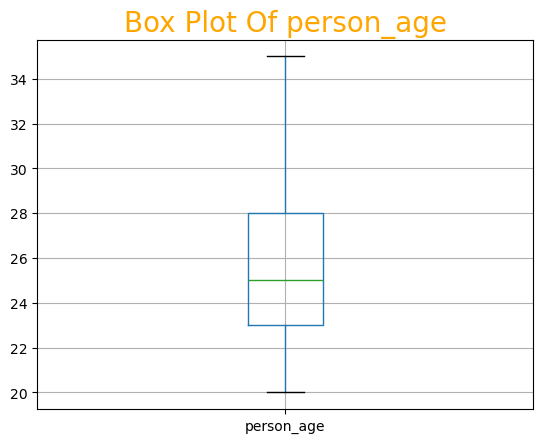

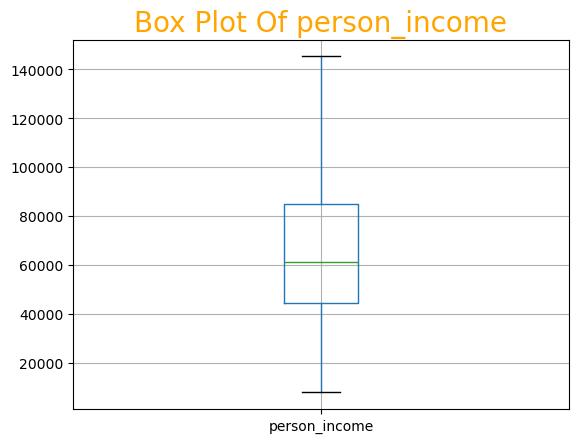

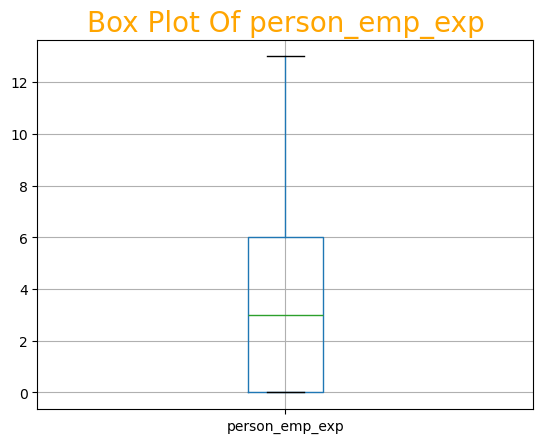

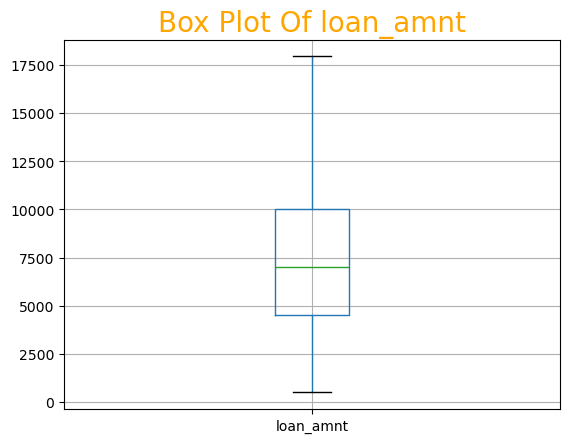

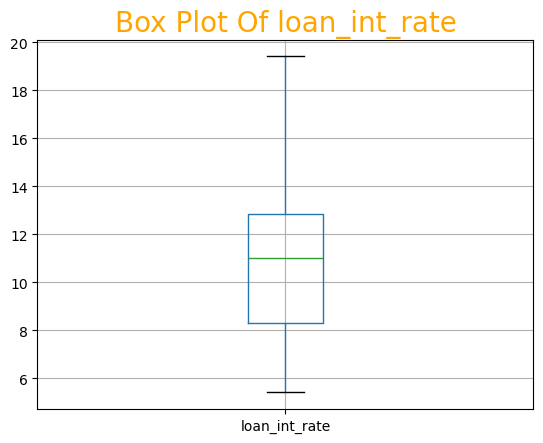

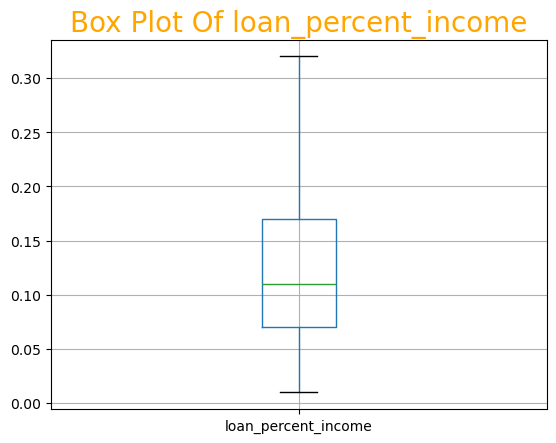

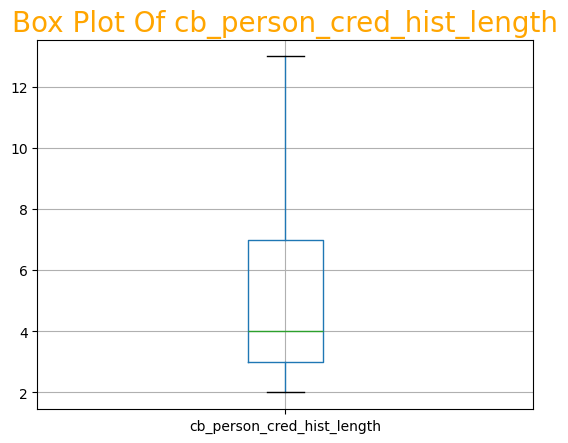

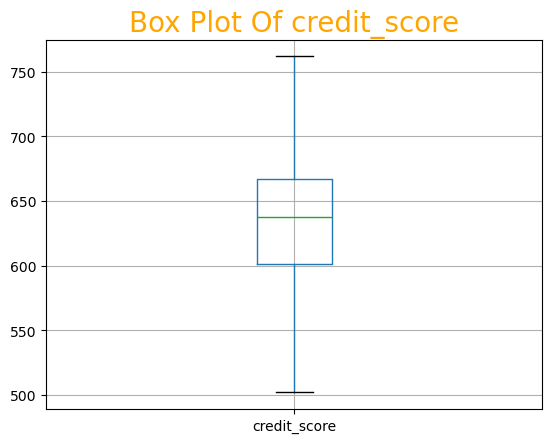

In [16]:
# boxplot all the numerical columns and see if there any outliers
for i in df_clean[['person_age', 'person_income', 'person_emp_exp', 
                'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                'cb_person_cred_hist_length', 'credit_score']].columns:
    df_clean.boxplot(column=i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="orange")
    plt.show()

Now the dataset are clean there are no outliers 

In [17]:
#make a copy of the datasets
df2=df_clean.copy()

### Class Imbalance:

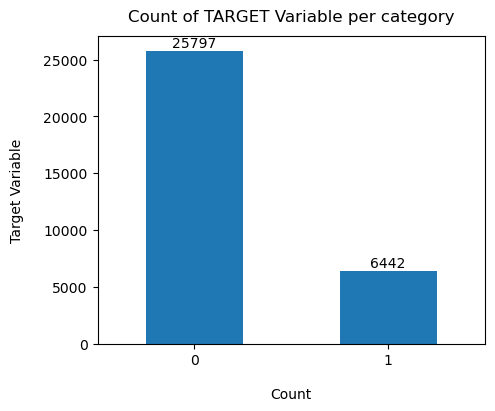

In [18]:
ax = df2['loan_status'].value_counts().plot(kind='bar', figsize=(5, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);
plt.xticks(rotation=0)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),           # the number to display
        (p.get_x() + p.get_width() / 2., p.get_height()), # position
        ha='center',                   # horizontal alignment
        va='bottom'                    # vertical alignment
    )
plt.show() 

In [19]:
100*df2['loan_status'].value_counts()/len(df2['loan_status'])

loan_status
0    80.017991
1    19.982009
Name: count, dtype: float64

* 0=NO   ,   1=YES
* Data is highly imbalanced, ratio = 80:20<br>
* Before we create the model we need to deal with class imbalance because can cause class bias  

### Features Encoding:

In [20]:
# Identify categorical columns
object_columns = df2.select_dtypes(include=['object','category']).columns

# Apply dummy encoding
loan_dummies = pd.get_dummies(
    df2,
    columns=object_columns,
    drop_first=True,   # avoid dummy variable trap
    dtype=int
)
loan_dummies.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,21,12282.0,0,1000.0,11.14,0.08,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
1,21,12951.0,0,2500.0,7.14,0.19,2,532,1,0,...,0,0,1,0,0,0,0,0,1,0
2,21,12739.0,0,1600.0,14.74,0.13,3,640,1,0,...,0,0,1,0,0,0,0,0,1,0
3,24,14283.0,1,1750.0,10.99,0.12,2,679,1,0,...,1,0,0,0,1,0,0,0,0,0
4,24,13866.0,0,1500.0,7.29,0.11,3,600,0,0,...,0,0,1,0,0,0,0,1,0,1


In [21]:
loan_dummies.to_csv("loan_dummies.csv",index=False)

In [22]:
 df3= loan_dummies.copy()

### MODEL CREATION

In [23]:
# Divide the data into dependents and independents
x=df3.drop(['loan_status'], axis=1)
y=df3['loan_status']

In [24]:
x

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,21,12282.0,0,1000.0,11.14,0.08,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
1,21,12951.0,0,2500.0,7.14,0.19,2,532,0,0,...,0,0,1,0,0,0,0,0,1,0
2,21,12739.0,0,1600.0,14.74,0.13,3,640,0,0,...,0,0,1,0,0,0,0,0,1,0
3,24,14283.0,1,1750.0,10.99,0.12,2,679,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,13866.0,0,1500.0,7.29,0.11,3,600,0,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32234,31,136832.0,9,12319.0,16.92,0.09,7,722,1,0,...,1,0,0,1,0,0,0,1,0,0
32235,27,35512.0,4,5000.0,15.83,0.14,5,505,0,0,...,0,0,0,1,0,0,0,1,0,0
32236,27,47971.0,6,15000.0,15.66,0.31,3,645,1,0,...,0,0,0,1,0,0,1,0,0,0
32237,33,56942.0,7,2771.0,10.02,0.05,10,668,1,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
# After pd.get_dummies(x)
import pickle
with open("model_columns.pkl", "wb") as f:
    pickle.dump(x.columns, f)


In [26]:
y

0        0
1        1
2        1
3        1
4        0
        ..
32234    1
32235    1
32236    1
32237    1
32238    1
Name: loan_status, Length: 32239, dtype: int64

In [27]:
# Splitting the data into training & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(f"X_train:{len(x_train)}, X_test:{len(x_test)}")

X_train:25791, X_test:6448


In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(25791, 22) (25791,)
(6448, 22) (6448,)


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [30]:
x_train

array([[ 1.41900435, -0.11319113,  2.38015843, ...,  2.2535488 ,
        -0.45135845, -1.05072056],
       [-0.01063178,  1.48519681,  0.9450724 , ..., -0.44374455,
        -0.45135845,  0.95172783],
       [ 1.99085881, -0.90648506,  2.09314123, ..., -0.44374455,
        -0.45135845, -1.05072056],
       ...,
       [-0.01063178, -0.01442651,  0.37103799, ..., -0.44374455,
        -0.45135845, -1.05072056],
       [-0.86841346, -1.06784599, -1.06404805, ...,  2.2535488 ,
        -0.45135845, -1.05072056],
       [-1.44026791, -0.40288672, -0.77703084, ..., -0.44374455,
        -0.45135845, -1.05072056]])

In [31]:
x_test

array([[-0.29655901,  0.46539709, -1.06404805, ..., -0.44374455,
         2.21553404,  0.95172783],
       [ 0.8471499 ,  0.0047399 ,  1.23208961, ..., -0.44374455,
        -0.45135845, -1.05072056],
       [-0.58248623, -1.51645871, -0.20299643, ...,  2.2535488 ,
        -0.45135845, -1.05072056],
       ...,
       [-0.58248623, -1.08390528, -0.49001363, ...,  2.2535488 ,
        -0.45135845, -1.05072056],
       [ 0.56122267, -1.41308577,  1.23208961, ..., -0.44374455,
        -0.45135845,  0.95172783],
       [ 0.27529545, -0.04155274,  0.65805519, ...,  2.2535488 ,
        -0.45135845, -1.05072056]])

#### Decision Tree Classifier

In [32]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [33]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [34]:
model_dt.score(x_test,y_test)

0.9125310173697271

In [35]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5196
           1       0.87      0.65      0.74      1252

    accuracy                           0.91      6448
   macro avg       0.89      0.81      0.84      6448
weighted avg       0.91      0.91      0.91      6448



As you can see that the accuracy is not bad but sometimes accurancy can be misleading, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1 as compare to Class 0, i.e. churned customers.<br>
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [36]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [37]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xr_train = sc.fit_transform(xr_train)
xr_test  = sc.transform(xr_test)

In [39]:
# Save the scaler
import pickle
with open('scaler.sav', 'wb') as f:
    pickle.dump(sc, f)

In [40]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [41]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)

In [42]:
yr_predict[30]

1

In [43]:
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.91214358083659
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3306
           1       0.91      0.92      0.92      3603

    accuracy                           0.91      6909
   macro avg       0.91      0.91      0.91      6909
weighted avg       0.91      0.91      0.91      6909



In [44]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[2999  307]
 [ 300 3303]]


- Now you can see the value of precision, recall & f1 score are no very different this perform  better than the first which the can not balance

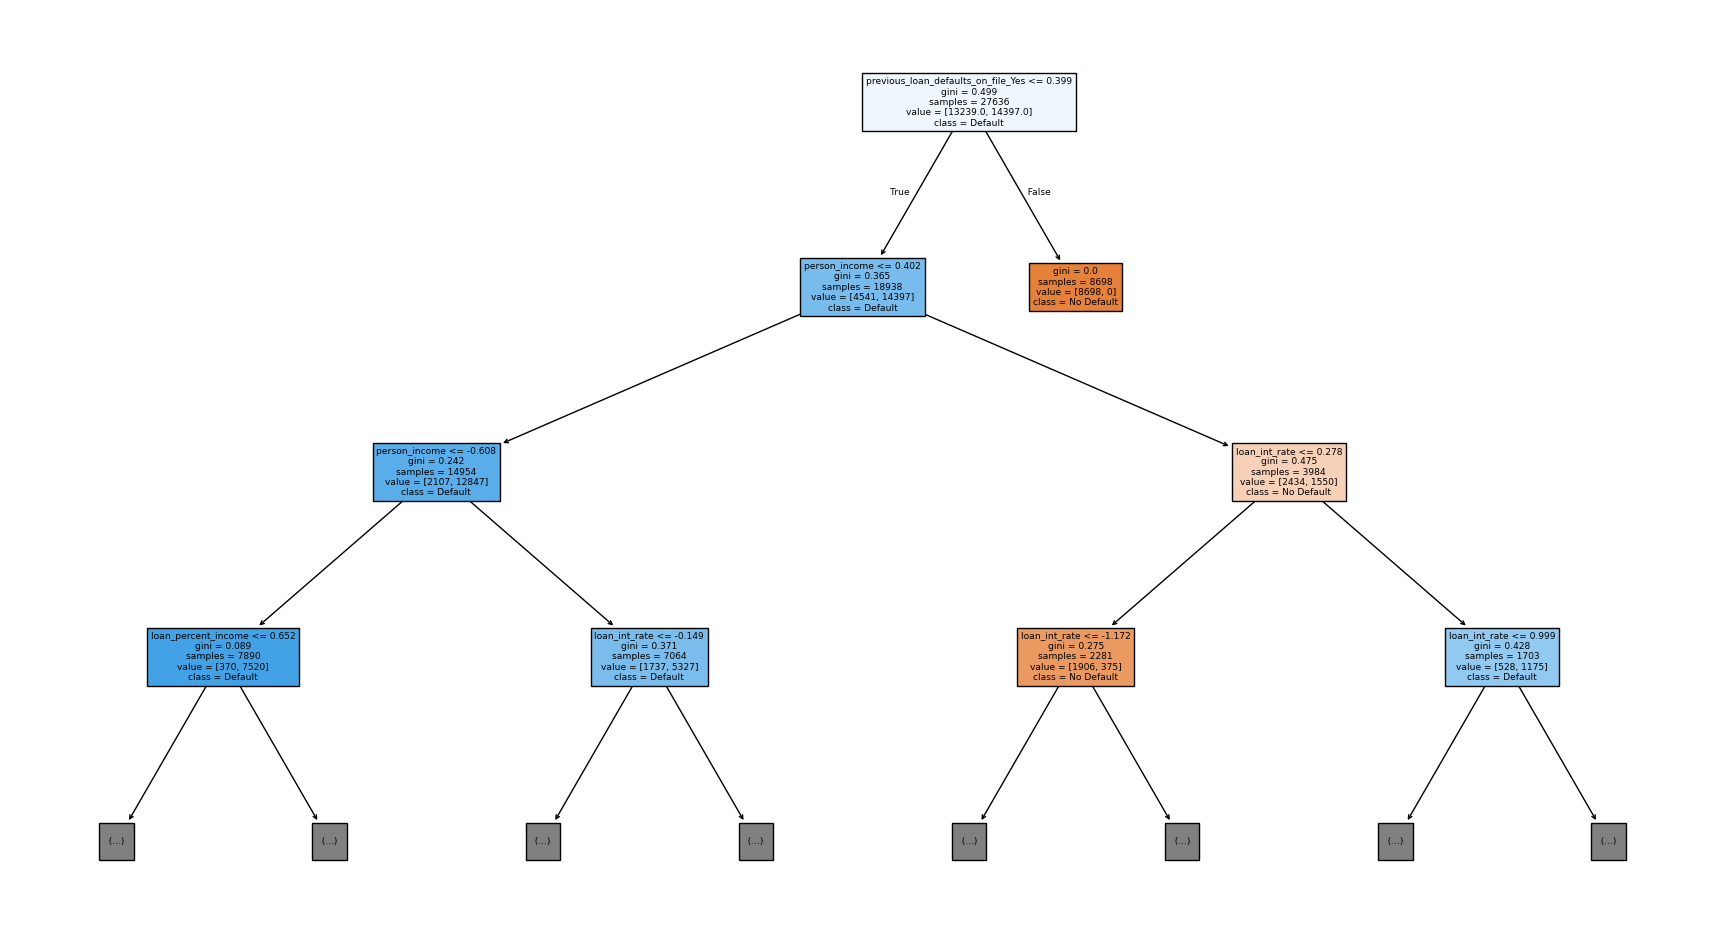

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(
    model_dt_smote,
    feature_names=x.columns,   # encoded feature names (22)
    class_names=["No Default", "Default"],
    filled=True,
    max_depth=3
)

plt.show()



#### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
# defining the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
# Making Predictions
y_pred= lr.predict(x_test)
y_pred

array([-0.14475917,  0.35086841,  0.61413518, ...,  0.65781182,
        0.16765907,  0.30461722])

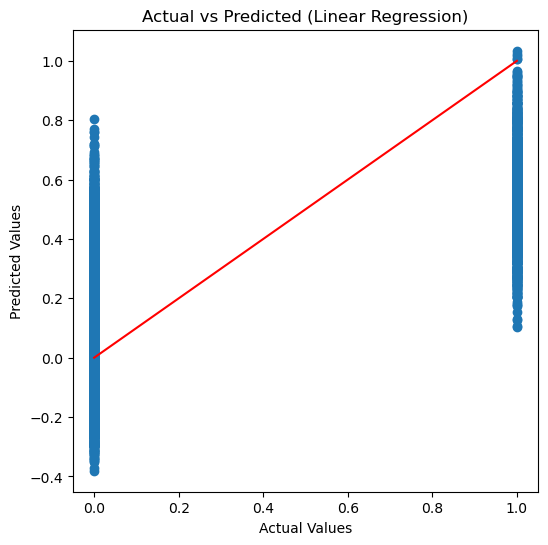

In [48]:
'''
# Plotting of y_test vs y_pred
plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()'''

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')  # Perfect prediction line
plt.show()


This plot is not an appropriate visualization because the data used is categorical ( loan status: approved or not approved) rather than continuous. Line plots are designed for continuous data that changes over an ordered sequence, like time series. Using a line plot for categorical data causes overlapping and meaningless lines, making the graph difficult to interpret. 

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Adjusted R²
n = x_test.shape[0]   # number of samples
K = x_test.shape[1]   # number of features
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-1-K)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
print("Adjusted R²:", adjusted_r2)

MAE: 0.23610942197749857
MSE: 0.08940076745492098
RMSE: 0.29899961112837753
R²: 0.42862947446578425
Adjusted R²: 0.4266730306429434


Comparing the two models Decision Tree and Linear Regression reveals that, after applying class balancing, the Decision Tree demonstrates superior performance, achieving better predictive accuracy than Linear Regression

In [50]:
#save the model
import pickle
with open('finalized_model.sav', 'wb') as file:
    pickle.dump(model_dt_smote, file)


In [51]:
with open('finalized_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
y_pred_final = loaded_model.predict(xr_test)

In [52]:
y_pred_final[49]

1

In [53]:
# list the columns you want to check
columns_to_check = ['person_gender', 'person_education', 'person_home_ownership','previous_loan_defaults_on_file','loan_intent']

for col in columns_to_check:
    print(f"Unique values in column '{col}':")
    print("Values:", loan[col].unique())
    print("-" * 50)


Unique values in column 'person_gender':
Values: ['female' 'male']
--------------------------------------------------
Unique values in column 'person_education':
Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
--------------------------------------------------
Unique values in column 'person_home_ownership':
Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
--------------------------------------------------
Unique values in column 'previous_loan_defaults_on_file':
Values: ['No' 'Yes']
--------------------------------------------------
Unique values in column 'loan_intent':
Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
--------------------------------------------------


In [54]:
import pandas as pd
import pickle

# --- Load trained model and scaler ---
with open('finalized_model.sav', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.sav', 'rb') as f:
    sc = pickle.load(f)

with open('model_columns.pkl', 'rb') as f:
    model_columns = pickle.load(f)

# --- Collect user input ---
print("Enter applicant details for loan approval:")

person_age = int(input("Age (e.g., 25, 30, 45): "))
person_gender = input("Gender (Male/Female): ").strip().lower()
person_education = input("Education (Master/High School/Bachelor/Associate/Doctorate): ").strip().lower()
person_income = float(input("Income (e.g., 50000, 75000): "))
person_emp_exp = float(input("Employment experience (years)(e.g., 2, 5, 10): "))
person_home_ownership = input("Home ownership (Rent/Own/Mortgage/Other): ").strip().lower()
loan_amnt = float(input("Loan amount: "))
loan_intent = input("Loan purpose ('Personal/Education/Medical/Venture/Homeimprovement/Debtconsolidation): ").strip().lower()
loan_int_rate = float(input("Loan interest rate (%)(e.g., 5.5, 12.0): "))
loan_percent_income = float(input("Loan percent of income: "))
cb_person_cred_hist_length = float(input("Credit history length (years): "))
credit_score = float(input("Credit score: "))
previous_loan_defaults_on_file = input("Previous loan defaults (NO/YES): ").strip().lower()

# --- Map input to match training column names ---
gender_map = {'male': 'Male', 'female': 'Female'}  # matches person_gender_male
education_map = {
    'master': 'Master',
    'high school': 'High School',
    'bachelor': 'Bachelor',
    'associate': 'Associate',
    'doctorate': 'Doctorate'
}
home_map = {'rent': 'RENT', 'own': 'OWN', 'mortgage': 'MORTGAGE', 'other': 'OTHER'}
loan_intent_map = {
    'personal': 'PERSONAL',
    'education': 'EDUCATION',
    'medical': 'MEDICAL',
    'venture': 'VENTURE',
    'homeimprovement': 'HOMEIMPROVEMENT',
    'debtconsolidation': 'DEBTCONSOLIDATION'
}
previous_defaults_map = {'no': 'No', 'yes': 'Yes'}

person_gender = gender_map.get(person_gender, 'male')
person_education = education_map.get(person_education, 'High School')
person_home_ownership = home_map.get(person_home_ownership, 'RENT')
loan_intent = loan_intent_map.get(loan_intent, 'PERSONAL')
previous_loan_defaults_on_file = previous_defaults_map.get(previous_loan_defaults_on_file, 'No')

# --- Create DataFrame ---
input_dict = {
    'person_age': person_age,
    'person_income': person_income,
    'person_emp_exp': person_emp_exp,
    'loan_amnt': loan_amnt,
    'loan_int_rate': loan_int_rate,
    'loan_percent_income': loan_percent_income,
    'cb_person_cred_hist_length': cb_person_cred_hist_length,
    'credit_score': credit_score,
    'person_gender': person_gender,
    'person_education': person_education,
    'person_home_ownership': person_home_ownership,
    'loan_intent': loan_intent,
    'previous_loan_defaults_on_file': previous_loan_defaults_on_file
}

input_df = pd.DataFrame([input_dict])

# --- Apply one-hot encoding (pd.get_dummies) ---
input_df = pd.get_dummies(input_df)

# --- Ensure all training columns exist ---
for col in model_columns:
    if col not in input_df.columns:
        input_df[col] = 0

input_df = input_df[model_columns]  # reorder columns to match model

# --- Scale input ---
input_scaled = sc.transform(input_df)

# --- Predict ---
prediction = loaded_model.predict(input_scaled)
prediction_prob = loaded_model.predict_proba(input_scaled)[0][1]

Enter applicant details for loan approval:


KeyboardInterrupt: Interrupted by user

In [ ]:
print(input_df)

In [ ]:
# Prepare formatted output in CAPITAL LETTERS
print("\n" + "="*40)
print("         LOAN APPLICATION SUMMARY")
print("="*40)

print("Applicant Details:")
print("-"*40)
print(f"Age:                      {person_age} YEARS")
print(f"Gender:                   {person_gender.upper()}")
print(f"Education Level:          {person_education.upper()}")
print(f"Annual Income:            ${person_income:,.0f}")
print(f"Employment Experience:    {person_emp_exp} YEARS")
print(f"Home Ownership:           {person_home_ownership.upper()}")

print("\nLoan Details:")
print("-"*40)
print(f"Loan Amount:              ${loan_amnt:,.0f}")
print(f"Loan Purpose:             {loan_intent.upper()}")
print(f"Interest Rate:            {loan_int_rate}%")
print(f"Loan/Income Ratio:        {loan_percent_income*100:.0f}%")

print("\nCredit Information:")
print("-"*40)
print(f"Credit History Length:    {cb_person_cred_hist_length} MONTHS")
print(f"Credit Score:             {credit_score}")
print(f"Previous Defaults:        {previous_loan_defaults_on_file.upper()}")

print("\n" + "="*40)
print("          FINAL DECISION")
print("="*40)
if prediction[0] == 1:
    print("✅ LOAN APPROVED")
else:
    print("❌ LOAN NOT APPROVED")


In [ ]:
21.0	female	High School	12282.0	0	OWN	1000.0	EDUCATION	11.14	0.08	2.0	504	Yes	0